# Generieren einer Wordcloud aus den Daten der Exilzeitschriften "Aufbau" und "La Otra Alemania"

## Download der benötigten Text-Dateien

In [1]:
#Import des wget-Moduls zum Download von Dateien aus dem Internet. Hier wird testweise eine Txt-Datei aus dem gesamten OCR_txt-Ordner heruntergeladen.
import wget
myurl = 'https://data.dnb.de/Aufbau_OtraAlemania/OCR_txt/1026563178_OCR.txt'
#response = wget.download(myurl, "C:\\Users\\fink\\")

100% [............................................................................] 646946 / 646946

In [2]:
#Import des urllib.request-Moduls zum Herunterladen und Öffnen von URLs.
#Hier werden alle Namen der Txt-Dateien in eine neu erstellte Txt-Datei 'Test.txt' gespeichert, um diese weiter zu nutzen.
import urllib.request
#urllib.request.urlretrieve('https://data.dnb.de/Aufbau_OtraAlemania/OCR_txt',"C:\\Users\\fink\\Test.txt")

('U:\\DNBLab Projekt\\Test.txt', <http.client.HTTPMessage at 0x2958966a7c0>)

In [13]:
#Import von BeautifulSoup zum Parsen von XML- und HTML-Dateien.
from bs4 import BeautifulSoup as soup
text = open("C:\\Users\\fink\\Test.txt", "rt") #Txt-Datei mit allen Dateinamen wird eingelesen
myfile = text.read()
#print(myfile)

test = soup(myfile, 'html.parser')
print(test.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Index of /Aufbau_OtraAlemania/OCR_txt
  </title>
  <h1>
   data.dnb.de
  </h1>
 </head>
 <body>
  <h1>
   Index of /Aufbau_OtraAlemania/OCR_txt
  </h1>
  <pre><img alt="Icon " src="/icons/blank.gif"/> <a href="?C=N;O=D">Name</a>                    <a href="?C=M;O=A">Last modified</a>      <a href="?C=S;O=A">Size</a>  <a href="?C=D;O=A">Description</a><hr/><img alt="[TXT]" src="/icons/text.gif"/> <a href="1026552451_OCR.txt">1026552451_OCR.txt</a>      2020-07-29 10:15  101K  
<img alt="[TXT]" src="/icons/text.gif"/> <a href="102655246X_OCR.txt">102655246X_OCR.txt</a>      2020-07-29 10:15   77K  
<img alt="[TXT]" src="/icons/text.gif"/> <a href="1026552478_OCR.txt">1026552478_OCR.txt</a>      2020-07-29 10:15   80K  
<img alt="[TXT]" src="/icons/text.gif"/> <a href="1026552486_OCR.txt">1026552486_OCR.txt</a>      2020-07-29 10:15   81K  
<img alt="[TXT]" src="/icons/text.gif"/> <a href="1026552494_OCR.t

In [16]:
#Herausfiltern aller Ergebnisse, die einen HTML a-Tag mit href (Attribut in HTML, das auf das Ziel des Links verweist) besitzen.
links = test.find_all('a', href=True)
#print(links)

[<a href="?C=N;O=D">Name</a>, <a href="?C=M;O=A">Last modified</a>, <a href="?C=S;O=A">Size</a>, <a href="?C=D;O=A">Description</a>, <a href="1026552451_OCR.txt">1026552451_OCR.txt</a>, <a href="102655246X_OCR.txt">102655246X_OCR.txt</a>, <a href="1026552478_OCR.txt">1026552478_OCR.txt</a>, <a href="1026552486_OCR.txt">1026552486_OCR.txt</a>, <a href="1026552494_OCR.txt">1026552494_OCR.txt</a>, <a href="1026552508_OCR.txt">1026552508_OCR.txt</a>, <a href="1026552516_OCR.txt">1026552516_OCR.txt</a>, <a href="1026552532_OCR.txt">1026552532_OCR.txt</a>, <a href="1026552540_OCR.txt">1026552540_OCR.txt</a>, <a href="1026552559_OCR.txt">1026552559_OCR.txt</a>, <a href="1026552567_OCR.txt">1026552567_OCR.txt</a>, <a href="1026552575_OCR.txt">1026552575_OCR.txt</a>, <a href="1026552583_OCR.txt">1026552583_OCR.txt</a>, <a href="1026552591_OCR.txt">1026552591_OCR.txt</a>, <a href="1026552605_OCR.txt">1026552605_OCR.txt</a>, <a href="1026552613_OCR.txt">1026552613_OCR.txt</a>, <a href="1026552621

In [32]:
#Die gefundenen Ergebnisse werden in die Liste ocr_links gespeichert
ocr_links = [] #Erstellen einer leeren Liste
for link in links: #Iterieren über die herausgefilterten Dateinamen
    x = link.get('href') #Alle Dateinamen, die nach einem href kommen (was alle Dateinamen sind), werden in die Variable x gespeichert
    ocr_links.append(x) #Die Variable x wird der leeren Liste hinzugefügt

#Die ersten vier a href-Ergebnisse beziehen sich nicht auf die OCR-Dateien, daher werden sie hier mithilfe von String-Slicing über den Index entfernt.
#Am Ende bleiben dann nur noch die Dateinamen der OCR-Dateien übrig.
del ocr_links[0:4]
#print(ocr_links)

['1026552451_OCR.txt', '102655246X_OCR.txt', '1026552478_OCR.txt', '1026552486_OCR.txt', '1026552494_OCR.txt', '1026552508_OCR.txt', '1026552516_OCR.txt', '1026552532_OCR.txt', '1026552540_OCR.txt', '1026552559_OCR.txt', '1026552567_OCR.txt', '1026552575_OCR.txt', '1026552583_OCR.txt', '1026552591_OCR.txt', '1026552605_OCR.txt', '1026552613_OCR.txt', '1026552621_OCR.txt', '102655263X_OCR.txt', '1026552648_OCR.txt', '1026552656_OCR.txt', '1026552664_OCR.txt', '1026552672_OCR.txt', '1026552680_OCR.txt', '1026552699_OCR.txt', '1026552702_OCR.txt', '1026552710_OCR.txt', '1026552729_OCR.txt', '1026552737_OCR.txt', '1026552745_OCR.txt', '1026552753_OCR.txt', '1026552761_OCR.txt', '102655277X_OCR.txt', '1026552788_OCR.txt', '1026552796_OCR.txt', '102655280X_OCR.txt', '1026552818_OCR.txt', '1026552826_OCR.txt', '1026552834_OCR.txt', '1026552842_OCR.txt', '1026552850_OCR.txt', '1026552869_OCR.txt', '1026552877_OCR.txt', '1026552885_OCR.txt', '1026552893_OCR.txt', '1026552907_OCR.txt', '10265529

In [4]:
#Mithilfe von String-Concatentation wird jeder Dateinamen in der ocr_links_Liste zu einem fertigen Link zusammengesetzt.
ocr_urls = ['https://data.dnb.de/Aufbau_OtraAlemania/OCR_txt/' + x for x in ocr_links]
#print(ocr_urls)

In [8]:
#Download der Txt-Dateien mit den generierten Links mithilfe on wget aus der ocr_urls-Datei:
#for y in ocr_urls:
    #response = wget.download(y, "C:\\Users\\fink")

## Durchsuchen der Dateien nach einem Suchwort

In [5]:
# Eingabe des Suchwortes mit Button zur Übernahme der eingegebenen Werte 

from IPython.display import display 
import ipywidgets as widgets 
from ipywidgets import interact, Layout 

tb1 = widgets.Text(value = 'Krieg', description ='Suchwort: ');display(tb1);


button = widgets.Button(description='Übernehmen!', layout=Layout(width='200px')); 
button.style.button_color='lightgreen';display(button); 
def on_button_clicked(sender): 
    a = tb1.value; 
    print('Folgendes Suchwort wurde übernommen: ' + str(tb1.value))     
button.on_click(on_button_clicked)

Text(value='Krieg', description='Suchwort: ')

Button(description='Übernehmen!', layout=Layout(width='200px'), style=ButtonStyle(button_color='lightgreen'))

Folgendes Suchwort wurde übernommen: Krieg


In [6]:
# Suche und Zählen der Zeilen mit Treffern

search = str(tb1.value).lower()
anzahl = 0 
anzahl2 = 0

filename = '102655263X_OCR.txt'
with open(filename, encoding="utf-8", errors="ignore") as f:
    items = f.readlines()
    for line in items:
        line = line.lower()
        if search in line:
            anzahl += 1
            
print('Insgesamt wurde das Suchwort', anzahl, "Mal in den zu durchsuchenden Textdateien gefunden.")

for name in ocr_links: 
    with open(name, encoding="utf-8", errors="ignore") as f:
        for num, line in enumerate(f, 1):
            line = line.lower() #Umwandeln in Kleinbuchstaben
            if search in line:
                anzahl2 += 1
print('Insgesamt wurde das Suchwort', anzahl2, "Mal in den zu durchsuchenden Textdateien gefunden.")  

Insgesamt wurde das Suchwort 41 Mal in den zu durchsuchenden Textdateien gefunden.
Insgesamt wurde das Suchwort 38750 Mal in den zu durchsuchenden Textdateien gefunden.


## Durchsuchen der Dateien nach den häufigsten Wörtern

In [5]:
from collections import Counter

content = []
            
#Einbau der Schleife erst hier wegen des leicht anderen Formats der Dateinamen... :             
for name in ocr_links: 
    with open(name, encoding="utf-8", errors="ignore") as f:
        morefiles = f.read()
        content.append(morefiles.lower())
        
import string

listofthings = list()

for entry in content:      
    #Satzzeichen entfernen
    for c in string.punctuation:
        entry= entry.replace(c," ")
    test = str.split(entry)
    listofthings.extend(test)
    
#Enternen der Seitenzahlen:
words = []
        
for item in listofthings: 
    if item.isdecimal() is True: 
        continue
    else: 
        words.append(item)
        
counts = Counter(words)

tokens = [word for word in words]
counts = Counter(tokens)

In [52]:
#Ausgabe der 20 häufigsten Wörter, allerdings sind hier noch viele Wörter dabei, die wir nicht dabei haben möchten.
print(counts.most_common(20))

[('und', 756204), ('der', 725250), ('die', 701380), ('in', 643307), ('von', 321791), ('den', 270866), ('zu', 260690), ('für', 213381), ('the', 212934), ('mit', 211676), ('das', 200440), ('n', 198883), ('m', 195527), ('ist', 187919), ('des', 185491), ('a', 184928), ('sie', 184778), ('i', 182437), ('im', 171310), ('—', 169221)]


In [6]:
#Einlesen einer Stopwords-Txt-Datei
with open('stopwords-de.txt', 'r', encoding='utf-8') as file:
    datei=file.read()
    file.close()

def Convert(string): #Schreiben einer Funktion, die den String in einer Liste speichert.
    li = list(string.split("\n"))
    return li

datei1=Convert(datei) #Datei wird mithilfe der Convert-Funktion als Liste in der neuen Variable datei1 gespeichert
#print(datei1)

In [7]:
#Um die nicht gewünschten Wörter (wie bpsw. "und", "der", etc.) zu entfernen, werden zum einen Stopwörter importiert und zum anderen auch selbst erstellt.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')


#Die Stopwörter werden zur leichteren Handhabung in Sets gespeichert.
stops = set(stopwords.words('english'))
stopsger = set(datei1)
stopsspan = set(stopwords.words('spanish'))
streets = set(('ave', 'avenue',  'street', 'str', 'drive', 'dr', 'broadway', 'ge', 'new', 'york', 'west', 'tel', ' apt', 'apt'))
sonstige = set(('ä', 'geben', 'fast', 'weiss', 'stand','stehen','the','bereit', '—', 'to','st', 'and', '•','■', 'ii', 'iii', 'ver', 'geb', 'fr', 'wa', 'de', 'wurde', 'ab', 'co', 'früher',
                'mehr', 'gen', 'gut', 'neue', 'ten', 'aufbau', '»', '«', 'mr', 'ms', 'mrs', 'max', 'schen', 'inc', 'gesucht'))

#Die Sets werden alle zum ersten Set 'stops' hinzugefügt.
stops.update(stopsger)
stops.update(stopsspan)
stops.update(streets)
stops.update(sonstige)

#Überprüfen der Stopwords
#print(stops)

In [8]:
#Ausgabe der 20 häufigsten Wörter (bereinigt von den Stopwörtern).
tokens_without_sw = [word for word in words if not word in stops]
counts_without_sw = Counter(tokens_without_sw)
print(counts_without_sw.most_common(20))

[('zimmer', 40348), ('city', 36376), ('club', 30879), ('frau', 30782), ('berlin', 29503), ('juden', 28314), ('wien', 27901), ('deutschland', 25798), ('jewish', 24628), ('deutschen', 24097), ('art', 23892), ('hotel', 22403), ('box', 22069), ('world', 21832), ('welt', 21532), ('washington', 20821), ('preise', 19730), ('american', 19537), ('haus', 19477), ('jüdischen', 19356)]


In [13]:
#Anzeige der häufigsten Wörter in einem pandas-DataFrame als Tabelle:
import pandas as pd

counts_without_sw_20 = counts_without_sw.most_common(20)

df = pd.DataFrame(counts_without_sw_20, columns = ["Wort", "Häufigkeit"])
df

,Wort,Häufigkeit
0,zimmer,40348
1,city,36376
2,club,30879
3,frau,30782
4,berlin,29503
5,juden,28314
6,wien,27901
7,deutschland,25798
8,jewish,24628
9,deutschen,24097


## Erstellung einer Wordcloud

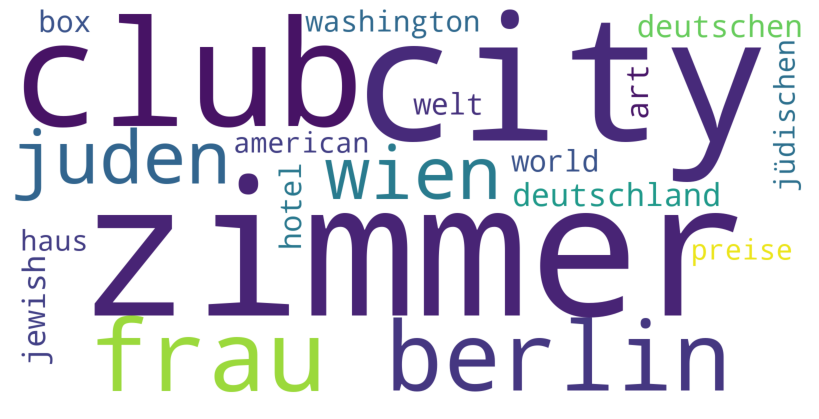

In [10]:
#Generieren einer Wordcloud mit 20 Wörtern.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_freq = WordCloud(width = 1600, height = 800,
                background_color ='white',
                min_font_size = 10,
                max_words=20).generate_from_frequencies(counts_without_sw)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_freq)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#wordcloud_freq.to_file("wordcloud_freq20.png")  #Speichern als png-Datei

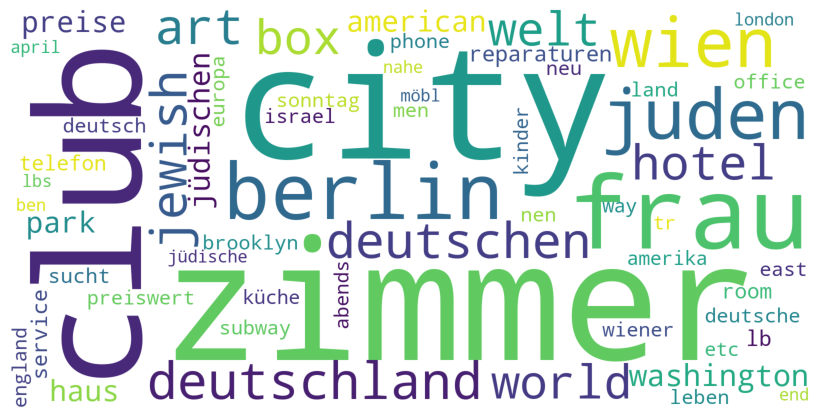

In [18]:
#Generieren einer Wordcloud mit 60 Wörtern.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_freq = WordCloud(width = 1600, height = 800,
                background_color ='white',
                min_font_size = 10,
                max_words=60).generate_from_frequencies(counts_without_sw)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_freq)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#wordcloud_freq.to_file("wordcloud_freq60.png")  #Speichern als png-Datei

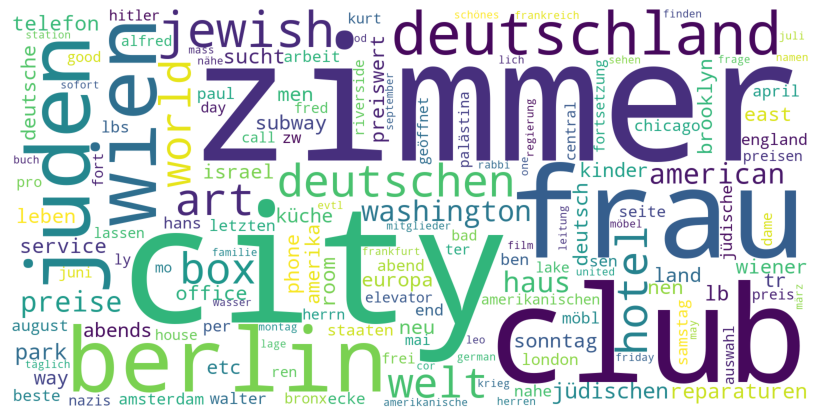

In [11]:
#Generieren einer Wordcloud mit 150 Wörtern.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_freq = WordCloud(width = 1600, height = 800,
                background_color ='white',
                min_font_size = 10,
                max_words=150).generate_from_frequencies(counts_without_sw)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_freq)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#wordcloud_freq.to_file("wordcloud_freq150.png")  #Speichern als png-Datei

In [26]:
#Angabe, wie viele Dateien durchsucht wurden. Dafür wurde ein neuer Ordner erstellt, alle Textdateien dort hin kopiert und der Inhalt dieses Ordners gezählt.
import os.path
path = 'C:\\Users\\fink\\OCR-Texte'
num_files = len([f for f in os.listdir(path)
                if os.path.isfile(os.path.join(path, f))])
print("Es wurden insgesamt", num_files, "Txt-Dateien durchsucht.")

Es wurden insgesamt 818 Txt-Dateien durchsucht.
